In [1]:
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
import numpy as np
import string
from gensim import corpora
import gensim
from nltk.corpus import words
from gensim.models import LdaModel, LsiModel, Word2Vec, CoherenceModel
from gensim.corpora import Dictionary
import pyLDAvis.gensim
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.decomposition import PCA
from collections import defaultdict
from spacy.lang.en import STOP_WORDS
from pprint import pprint

In [2]:
# configure number of worker
import multiprocessing
cpu_count = multiprocessing.cpu_count()
worker = cpu_count - 1
print "No of worker to be used = %s"%worker

No of worker to be used = 7


In [3]:
# stop words
stop_wrd = []
with open('stopword.txt') as f:
    for c in f:
        c = c.replace(",","").replace("\n","").replace('"',"").strip()
        stop_wrd.append(c)
stop = list(STOP_WORDS)
print(len(stop))

305


# <div class="alert alert-block alert-info"><font color='red'> Non-Anonymous User (Negative Comments) <font>  </div>

In [4]:
doc_complete = []
with open('verified_negativecomment.txt') as f:
    for l in f:
        doc_complete.append(l)   

In [5]:
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    stop_free = " ".join([i for i in punc_free.split() if i not in stop_wrd])
    stop_free = ' '.join(i for i in stop_free.split() if not i.startswith('u0'))
    #stop_free = ' '.join(i for i in stop_free.split() if len(i)>3)
    stop_free = " ".join([i for i in stop_free.lower().split() if not unicode(i, 'utf-8').isnumeric()])
    normalized = " ".join(lemma.lemmatize(word) for word in stop_free.split())
    return normalized
doc_clean = [clean(doc).split() for doc in doc_complete]
print(doc_clean[:5])

[[u'let', u'victimize', u'raped', u'impregnated', u'woman', u'girl', u'fun', u'food', u'stamp', u'find', u'broke', u'raise', u'child', u'forced', u'rapist', u'sociopath', u'john'], [u'tennessee', u'state', u'ratify', u'19th', u'amendment', u'state', u'gave', u'scope', u'monkey', u'trial', u'stupid', u'obesity', u'consequence'], ['roe', 'wade', 'settled', 'law', 'tn', 'state', 'allowed', 'interfere', 'matter', 'woman', 'doctor', 'chooses', 'minister', 'rabbi'], [u'good', u'post', u'ben', u'hit', u'head', u'money', u'politics', u'game', u'witnessing', u'prime', u'resolve', u'issue', u'take', u'turn', u'worst'], [u'republican', u'righteous', u'greedy', u'ignore', u'truth', u'stop', u'clown', u'destroying', u'environmentvote']]


In [6]:
# frequency calculation of token in all documents
frequency = defaultdict(int)
for text in doc_clean:
    for token in text:
        frequency[token] += 1

In [7]:
print frequency['good']

3059


In [8]:
# make new text data by removing out the token that have occurence less then 2
minimum_freq = 1
len_of_token = 2
# doc_clean = [[token for token in text if frequency[token] > minimum_freq]
#           for text in doc_clean]
doc_clean = [[token for token in text if len(token) > len_of_token and frequency[token] > minimum_freq]
          for text in doc_clean]
# print doc_clean1[17]

In [9]:
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [10]:
corpus = [dictionary.doc2bow(doc) for doc in doc_clean]

In [11]:
word_frequency = [[(dictionary[id], freq) for id, freq in cp] for cp in corpus]

In [ ]:
# word_frequency_df = pd.DataFrame(columns=['words','frequency'])
# for x in range(len(word_frequency)):
#     xyz =  pd.DataFrame(word_frequency[x],columns=['words','frequency'])
#     #xyz['article_no'] = x+1
#     word_frequency_df = word_frequency_df.append(xyz,ignore_index=True)

In [ ]:
# word_frequency_df

In [13]:
Lda = gensim.models.ldamulticore.LdaMulticore
ldamodel = Lda(doc_term_matrix, num_topics=200, id2word = dictionary, passes=20, workers=worker)

/home/ubuntu/.virtualenvs/nlp/local/lib/python2.7/site-packages/gensim/models/ldamodel.py:775: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [ ]:
#def evaluate_graph(dictionary, corpus, texts, limit):
#    """
#    Function to display num_topics - LDA graph using c_v coherence
    
#    Parameters:
#    ----------
#    dictionary : Gensim dictionary
#    corpus : Gensim corpus
#    limit : topic limit
    
#    Returns:
#    -------
 #   lm_list : List of LDA topic models
 #   """
#    c_v = []
#    lm_list = []
#    for num_topics in range(1, limit):
#        lm = gensim.models.ldamulticore.LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary)
#        lm_list.append(lm)
#        cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
#        c_v.append(cm.get_coherence())
#        print "Coherence of model with number of topic = %s is %s"%(num_topics,cm.get_coherence())

    # Show graph
#    x = range(1, limit)
#    plt.plot(x, c_v)
#    plt.xlabel("num_topics")
#    plt.ylabel("Coherence score")
#    plt.legend(("c_v"), loc='best')
#    plt.show()
    
#    return lm_list

In [ ]:
#lm_list = evaluate_graph(dictionary, corpus, doc_clean, 101)

In [14]:
# Topic Coherence is defined as the average / median of the pairwise word-similarity scores of the words in the topic
# A good model will generate coherent topics, i.e., topics with high topic coherence scores.

top_topics = ldamodel.top_topics(corpus,topn=2)
    # # Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / ldamodel.num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)
pprint(top_topics)



Average topic coherence: -4.6113.
[([(0.14494677, u'insult'), (0.10316299, u'itu2019s')], -0.41330828524464175),
 ([(0.50579095, u'illegal'), (0.32814243, u'jerk')], -0.6724879563784943),
 ([(0.12614897, u'college'), (0.1255573, u'study')], -0.6898595060951782),
 ([(0.10457084, u'regime'), (0.0661079, u'creation')], -0.7114567924864706),
 ([(0.21113662, u'china'), (0.09521578, u'india')], -0.7401339175965477),
 ([(0.05157433, u'ignore'), (0.051051408, u'gujarat')], -0.9363415281371021),
 ([(0.17601374, u'base'), (0.10263162, u'regional')], -0.9788893878743831),
 ([(0.11961721, u'bill'), (0.047971636, u'land')], -1.0696892489276904),
 ([(0.33169386, u'power'), (0.10175566, u'people')], -1.1555750159039),
 ([(0.20083804, u'policy'), (0.17772724, u'society')], -1.2102033538423809),
 ([(0.09200112, u'chief'), (0.0685876, u'broken')], -1.230359559168508),
 ([(0.21484645, u'crore'), (0.14564754, u'account')], -1.3045940737459805),
 ([(0.089560494, u'useless'), (0.03787583, u'india')], -1.355

In [ ]:
#x = range(1, limit)
 #   plt.plot(x, avg_topic_coherence)
  #  plt.xlabel("num_topics")
   # plt.ylabel("Coherence score")
   # plt.legend(("c_v"), loc='best')
   # plt.show()
#return top_topics

In [ ]:
#top_topics = evaluate_graph(dictionary, corpus, top_topics, 10)


# LDA Model -- Based on Probabilistic Graphical Models 

<div class="alert alert-block alert-info"> <font color='Blue'> Interpreting pyLDAvis output:
<ul> <li>Bubbles on the left-hand side of plot represents a topic. Larger the bubble, the more prevalent is that topic. </li>
<li>Good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant. </li>
<li>Model with too many topics, will have many overlaps, small sized bubbles are clustered in one region of the chart.</li>
<li>The words on the right-hand side are the salient keywords that form the selected topic.</li>
<li>The red bars represent the frequency of a term in a given topic, and the blue bars represent term's frequency across the entire corpus.</li> </ul></font> </div>

In [15]:
print(ldamodel.print_topics(num_topics=20))

[(109, u'0.346*"minister" + 0.064*"prime" + 0.047*"union" + 0.038*"chief" + 0.031*"finance" + 0.020*"narendra" + 0.020*"home" + 0.019*"singh" + 0.018*"issue" + 0.014*"india"'), (165, u'0.072*"basis" + 0.061*"reading" + 0.058*"telling" + 0.041*"quran" + 0.040*"flat" + 0.039*"domestic" + 0.033*"bureaucrat" + 0.032*"ship" + 0.031*"sena" + 0.025*"shiv"'), (104, u'0.073*"doctor" + 0.064*"hospital" + 0.063*"dead" + 0.059*"wid" + 0.049*"part" + 0.044*"blood" + 0.031*"injured" + 0.031*"district" + 0.026*"added" + 0.026*"patient"'), (94, u'0.154*"human" + 0.099*"blind" + 0.066*"right" + 0.062*"eye" + 0.024*"activist" + 0.023*"male" + 0.019*"bhakt" + 0.017*"people" + 0.016*"personally" + 0.015*"fat"'), (108, u'0.230*"case" + 0.145*"court" + 0.058*"justice" + 0.055*"judge" + 0.031*"supreme" + 0.026*"system" + 0.018*"witness" + 0.017*"trial" + 0.015*"judgement" + 0.013*"maximum"'), (159, u'0.122*"evil" + 0.083*"express" + 0.077*"brain" + 0.057*"inside" + 0.053*"impossible" + 0.049*"harmful" + 0.04

In [16]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)

/home/ubuntu/.virtualenvs/nlp/local/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
181    1.628132        1       1 -0.217527 -0.077019
85     1.455601        1       2  0.007877 -0.058093
96     1.430342        1       3 -0.181600 -0.243931
42     1.121490        1       4 -0.135813 -0.048015
30     1.049743        1       5 -0.091594 -0.011753
152    1.046285        1       6 -0.075031 -0.123993
108    1.015528        1       7 -0.050289 -0.030036
10     0.964290        1       8 -0.148078  0.083127
7      0.926337        1       9 -0.040862 -0.048022
129    0.920970        1      10 -0.120020  0.019023
65     0.856249        1      11  0.064165 -0.140204
139    0.834334        1      12 -0.110677  0.021765
43     0.793197        1      13 -0.010314  0.058735
46     0.788319        1      14 -0.102005  0.099116
24     0.773280        1      15 -0.049068 -0.029918
66     0.768060        1      16 -0.080465 -0.040804
179    0.766612        1      17 -0.105669  0.035366
167    0.717460        1      18 -0.091929 -0.080551
52     0.698882        1      19 -0.000213  0.014367
69     0.698589        1      20  0.119952 -0.007573
97     0.690098        1      21  0.076450 -0.120022
160    0.687992        1      22 -0.106697 -0.059997
41     0.679121        1      23 -0.013621 -0.167441
57     0.671000        1      24 -0.064446  0.009302
138    0.669796        1      25 -0.128648 -0.020491
199    0.668850        1      26  0.075292 -0.021148
136    0.667281        1      27 -0.005029 -0.024814
121    0.666864        1      28  0.062421 -0.056258
191    0.663758        1      29  0.044902  0.040754
171    0.656461        1      30 -0.083381 -0.218346
...         ...      ...     ...       ...       ...
98     0.350736        1     171 -0.018364 -0.106260
99     0.349635        1     172 -0.049529 -0.011385
118    0.349119        1     173 -0.057429  0.066026
141    0.347837        1     174  0.059038  0.012032
75     0.345883        1     175  0.040692  0.046289
68     0.341268        1     176  0.004730  0.037055
146    0.334478        1     177  0.044948 -0.091406
29     0.332750        1     178  0.068403  0.011802
23     0.326109        1     179  0.011001 -0.079746
44     0.322130        1     180  0.015098  0.004510
73     0.322017        1     181 -0.039218  0.081217
80     0.321561        1     182 -0.001580  0.042379
123    0.318804        1     183  0.032667 -0.011397
22     0.309976        1     184  0.088411  0.008285
12     0.309312        1     185  0.070417 -0.016164
189    0.306359        1     186  0.042692  0.033627
130    0.301932        1     187  0.100989  0.007885
190    0.301330        1     188  0.017757  0.040872
87     0.299284        1     189  0.044332  0.052594
90     0.298392        1     190  0.143588  0.003620
128    0.294902        1     191 -0.002178  0.034773
186    0.291722        1     192  0.119868  0.010574
195    0.288354        1     193  0.115981  0.007713
144    0.288337        1     194  0.081056  0.012079
162    0.285537        1     195  0.015191 -0.066294
39     0.283412        1     196  0.152947 -0.011281
125    0.274705        1     197 -0.007440  0.010922
17     0.273375        1     198  0.051760  0.053439
5      0.239159        1     199  0.050526  0.030854
28     0.226394        1     200  0.134348  0.007848

[200 rows x 5 columns], topic_info=       Category          Freq           Term         Total  loglift  logprob
term                                                                        
24872   Default   9156.000000     government   9156.000000  30.0000  30.0000
29039   Default   8246.000000          money   8246.000000  29.0000  29.0000
17179   Default   6589.000000           govt   6589.000000  28.0000  28.0000
158     Default   6097.000000          wrong   6097.000000  27.0000  27.0000
38718   Default   5685.000000          state   5685.000000  26.0000  26.0000
36380   Default  19807.000000          india  19807.000

# LSI Model - (Latent Semantic Analysis) 

<div class="alert alert-block alert-info"><font color = 'blue'>Learns latent topics by performing matrix decomposition (SVD) on the term-document matrix
LSI finds low-dimension representation of documents and words.
Faster to train than LDA, but has lower accuracy. </font> </div>

In [17]:
model = LsiModel(doc_term_matrix, id2word=dictionary,num_topics=20)  # train model

In [18]:
for c in model.print_topics(100):
     print c

(0, u'0.492*"india" + 0.352*"people" + 0.250*"indian" + 0.209*"country" + 0.187*"year" + 0.160*"government" + 0.149*"time" + 0.137*"money" + 0.106*"govt" + 0.105*"party"')
(1, u'-0.665*"india" + 0.358*"people" + 0.328*"ignore" + 0.164*"gujarat" + 0.121*"marriage" + 0.116*"development" + 0.114*"modiu2019s" + 0.104*"government" + 0.102*"life" + -0.098*"pakistan"')
(2, u'-0.395*"ignore" + -0.340*"indian" + 0.337*"people" + -0.280*"india" + -0.202*"gujarat" + 0.150*"money" + -0.147*"marriage" + 0.147*"country" + -0.136*"development" + -0.135*"modiu2019s"')
(3, u'-0.599*"people" + 0.277*"applicant" + 0.241*"plot" + 0.219*"land" + 0.188*"dda" + 0.176*"money" + 0.171*"time" + 0.170*"delhi" + 0.141*"scheme" + 0.133*"corrupt"')
(4, u'0.530*"british" + 0.354*"japan" + 0.307*"indian" + -0.267*"india" + -0.215*"people" + 0.132*"japanese" + 0.128*"country" + 0.124*"war" + -0.120*"applicant" + 0.110*"muslim"')
(5, u'0.622*"indian" + -0.409*"british" + -0.285*"japan" + -0.216*"india" + 0.166*"men" + 

# Heat map 
<div class="alert alert-block alert-info"><font color = 'blue'> Strength of color bar represents normalized ratio of how often a topic X is mentioned in Document Y </font> </div>

In [19]:
K = model.num_topics
columns = []
columns_dict = {}
for k in range(1,K+1):
    columns.append(str(k))
    columns_dict[k-1] = ""

In [20]:
df = pd.DataFrame(columns = columns)
pd.set_option('display.width', 1000)
zz = np.zeros(shape=(1000,K))
last_number=0
DC={}
for x in range (10):
  data = pd.DataFrame(columns_dict,index=[0])
  df=df.append(data,ignore_index=True)  
for line in model.print_topics(num_topics=K):
    tp, w = line
    #print tp
    probs=w.split("+")
    y=0
    for pr in probs:
        a=pr.split("*")
        df.iloc[y,tp] = a[1]       
        if a[1] in DC:
           zz[DC[a[1]]][tp]=a[0]
        else:
           zz[last_number][tp]=a[0]
           DC[a[1]]=last_number
           last_number=last_number+1
        y=y+1

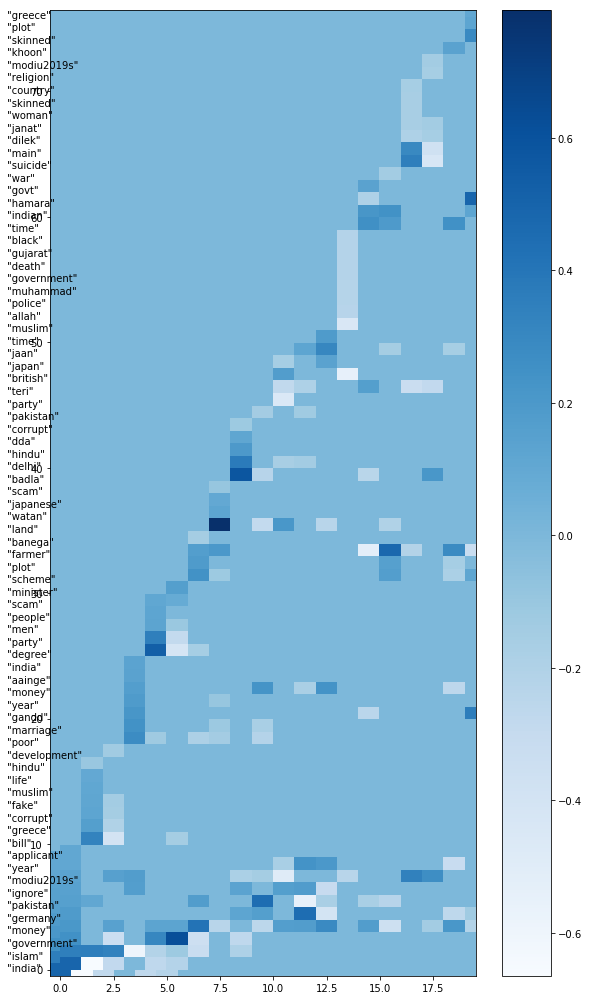

In [21]:
zz=np.resize(zz,(len(DC.keys()),zz.shape[1]))
plt.figure(figsize = (8,14))
plt.pcolor(zz,norm=None, cmap='Blues')
plt.colorbar(cmap='Blues')
plt.imshow(zz, cmap='Blues', interpolation='nearest',aspect='auto')
for val, key in enumerate(DC.keys()):
        plt.text(-2.5, val + 0.5, key,
                 horizontalalignment='left',
                 verticalalignment='top'
                 )
plt.gca().invert_yaxis()      # flip the y-axis so the texts are in the order
plt.tight_layout()            # fixes margins
plt.show()

In [22]:
def topics_to_vectorspace(n_topics, n_words=100):
    rows = []
    for i in xrange(n_topics):
        temp = model.show_topic(i, n_words)
        row = dict(((j[1],j[0]) for j in temp))
        rows.append(row)
    return rows
vec = DictVectorizer()
X = vec.fit_transform(topics_to_vectorspace(K))
X.shape

(20, 1982)

# PCA (Principal Component Analysis) 

<div class="alert alert-block alert-info"><font color = 'blue'> Statistical procedure to convert a set of observations of correlated variables into set of values of linearly uncorrelated variables called principal componets. </font> </div> 

In [ ]:
#pca = PCA(n_components=2)
#X_pca = pca.fit(X.toarray()).transform(X.toarray())
#for i in xrange(X_pca.shape[0]):
#    plt.scatter(X_pca[i, 0], X_pca[i, 1], alpha=.5)
#    plt.text(X_pca[i, 0], X_pca[i, 1], s=' ' + str(i))    
#plt.show()

In [ ]:
# X_pca = pca.fit(X.T.toarray()).transform(X.T.toarray())
# plt.figure(figsize=(20,20)) 
# for i, n in enumerate(vec.get_feature_names()):
#     plt.scatter(X_pca[i, 0], X_pca[i, 1], alpha=.5)
#     plt.text(X_pca[i, 0], X_pca[i, 1], s=' ' + n, fontsize=8)
# plt.show()

/home/ubuntu/.virtualenvs/nlp/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


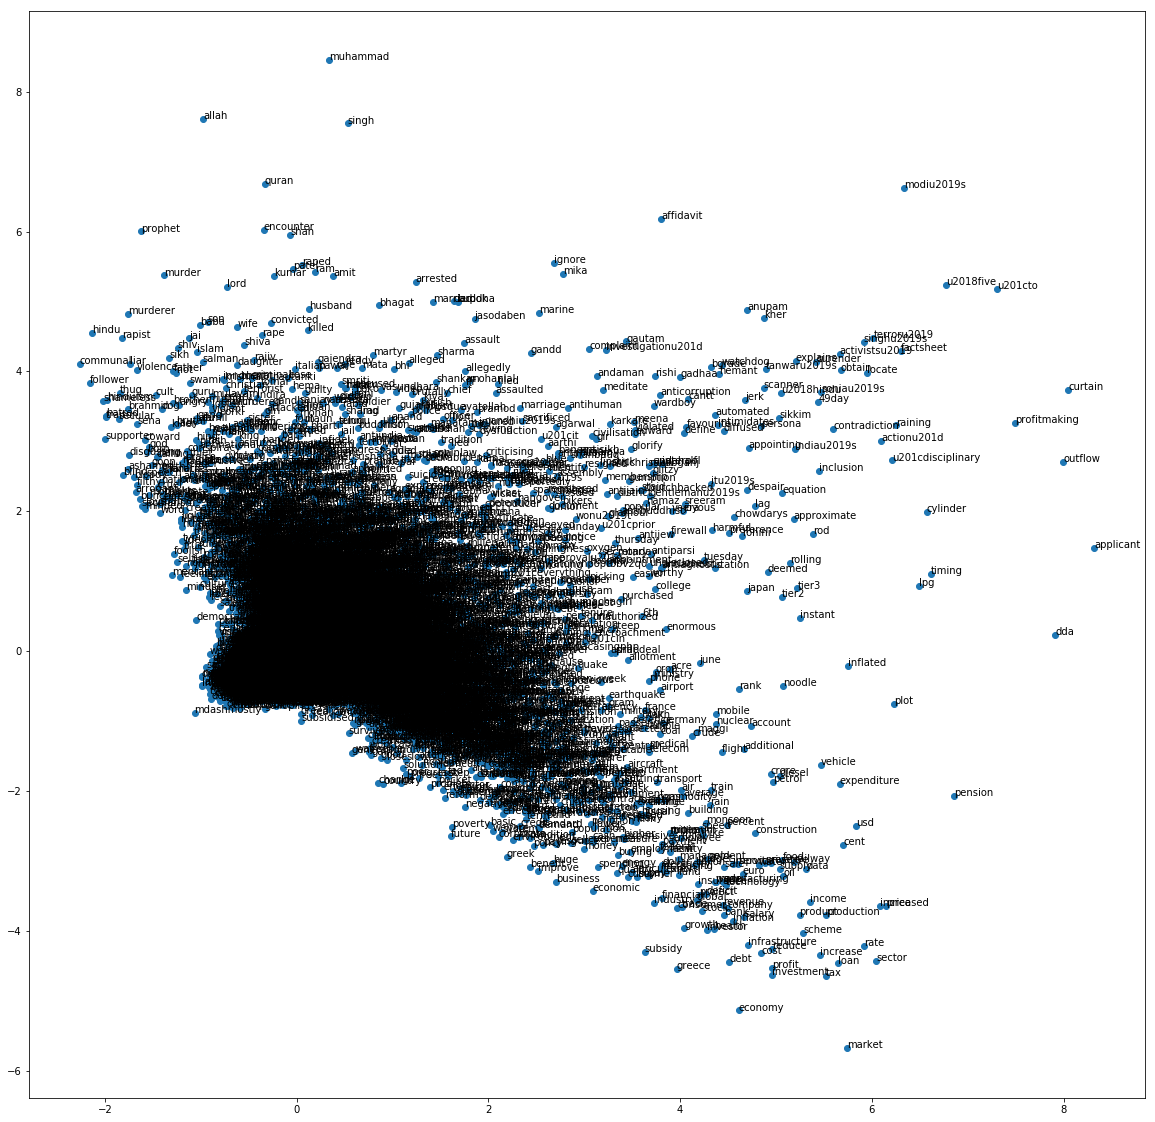

In [23]:
sentences = doc_clean
model = Word2Vec(sentences,workers=3)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.figure(figsize = (20,20))
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# <div class="alert alert-block alert-info"><font color='red'> Non-Anonymous User (Positive Comments) <font> </div> #


In [24]:
doc_complete = []
with open('verified_positivecomment.txt') as f:
    for l in f:
        doc_complete.append(l) 

In [25]:
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    stop_free = " ".join([i for i in punc_free.split() if i not in stop_wrd])
    stop_free = ' '.join(i for i in stop_free.split() if not i.startswith('u0'))
    #stop_free = ' '.join(i for i in stop_free.split() if len(i)>3)
    stop_free = " ".join([i for i in stop_free.lower().split() if not unicode(i, 'utf-8').isnumeric()])
    normalized = " ".join(lemma.lemmatize(word) for word in stop_free.split())
    return normalized
doc_clean = [clean(doc).split() for doc in doc_complete]
print(doc_clean[:5])

[['john'], [u'roe', u'wade', u'settled', u'law', u'slavery', u'time', u'attempting', u'ensure', u'abortion', u'clinic', u'licensed', u'regulated', u'woman', u'asked', u'heart', u'wrenching', u'choice', u'hear', u'hand', u'doctor', u'fully', u'informed', u'tanning', u'bed', u'facility', u'licensing', u'regulation', u'abortion', u'clinic', u'state', u'tennessee', u'worried'], [u'woman', u'havent', u'thought', u'decision', u'doctor', u'technically', u'abortion', u'clinic', u'wouldnt', u'woman', u'personal', u'doctor', u'walking', u'doctor', u'theyve', u'met', u'btw', u'lower', u'wrote', u'opinion', u'article', u'waiting', u'periodfor', u'irrational', u'immature', u'people', u'inside', u'clinic', u'speak', u'opinion', u'personally', u'ended', u'horrid', u'infection', u'clinic', u'nashville', u'child', u'narrowminded', u'judge'], [u'sound', u'good', u'bill', u'glad', u'pas'], [u'licensed', u'ambulatory', u'surgical', u'treatment', u'center', u'entail', u'guess', u'good', u'leglislation', u'

In [26]:
# frequency calculation of token in all documents
frequency = defaultdict(int)
for text in doc_clean:
    for token in text:
        frequency[token] += 1

In [27]:
# make new text data by removing out the token that have occurence less then 2
minimum_freq = 1
len_of_token = 2
# doc_clean = [[token for token in text if frequency[token] > minimum_freq]
#           for text in doc_clean]
doc_clean = [[token for token in text if len(token) > len_of_token and frequency[token] > minimum_freq]
          for text in doc_clean]
# print doc_clean1[17]

In [28]:
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# LDA

In [29]:
Lda = gensim.models.ldamulticore.LdaMulticore
ldamodel = Lda(doc_term_matrix, num_topics=200, id2word = dictionary, passes=20 ,workers=worker)

In [ ]:
#top_topics = model.top_topics(corpus, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
#avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
#print('Average topic coherence: %.4f.' % avg_topic_coherence)

#from pprint import pprint
#pprint(top_topics)

In [30]:
print(ldamodel.print_topics(num_topics=20))

[(27, u'0.081*"directly" + 0.048*"behavior" + 0.045*"domestic" + 0.028*"pack" + 0.028*"indirectly" + 0.028*"distance" + 0.025*"gonna" + 0.021*"costly" + 0.020*"cute" + 0.020*"entering"'), (78, u'0.099*"note" + 0.067*"rupee" + 0.067*"ram" + 0.048*"ancient" + 0.047*"heat" + 0.044*"route" + 0.031*"produced" + 0.030*"wave" + 0.030*"discus" + 0.028*"summer"'), (10, u'0.107*"technology" + 0.058*"modern" + 0.054*"space" + 0.048*"science" + 0.033*"material" + 0.025*"computer" + 0.025*"soft" + 0.020*"requires" + 0.018*"world" + 0.018*"wide"'), (160, u'0.149*"dog" + 0.061*"minute" + 0.046*"apparently" + 0.044*"sufficient" + 0.026*"promotion" + 0.024*"breed" + 0.022*"inspiration" + 0.019*"baat" + 0.019*"brown" + 0.018*"dip"'), (141, u'0.073*"arm" + 0.070*"attacking" + 0.060*"strength" + 0.050*"requirement" + 0.045*"ball" + 0.035*"superior" + 0.027*"chest" + 0.026*"businessmen" + 0.026*"iron" + 0.026*"crowd"'), (148, u'0.067*"keeping" + 0.064*"achievement" + 0.060*"meant" + 0.042*"winning" + 0.039

In [31]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)

/home/ubuntu/.virtualenvs/nlp/local/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
54     1.948359        1       1 -0.061732  0.063839
151    1.470589        1       2 -0.145587 -0.035250
166    1.369148        1       3  0.016828  0.069914
35     1.285880        1       4 -0.181437  0.209498
53     1.195736        1       5 -0.156341 -0.031999
49     1.072744        1       6 -0.056920 -0.098509
79     1.048478        1       7 -0.063320  0.038375
24     0.981476        1       8 -0.138875 -0.067728
44     0.954774        1       9 -0.029482 -0.042190
50     0.902330        1      10 -0.040451 -0.059910
152    0.901475        1      11 -0.002096  0.012379
40     0.898012        1      12  0.084135 -0.014728
186    0.887524        1      13 -0.071459 -0.036765
155    0.881532        1      14 -0.164981 -0.039237
119    0.880981        1      15 -0.133060  0.107445
173    0.877517        1      16  0.081089  0.046294
176    0.864158        1      17 -0.080559  0.199265
96     0.849509        1      18 -0.030328 -0.008378
123    0.847030        1      19 -0.171542  0.159644
67     0.804509        1      20 -0.119367 -0.099181
167    0.795395        1      21 -0.016718  0.113918
77     0.794316        1      22 -0.065591  0.063850
120    0.785960        1      23 -0.015268 -0.059035
58     0.781255        1      24 -0.114788 -0.051850
99     0.780737        1      25 -0.133740  0.041186
128    0.753556        1      26 -0.087944 -0.050291
147    0.743402        1      27 -0.200321  0.064494
103    0.733530        1      28 -0.069278 -0.062284
94     0.722428        1      29 -0.065534 -0.066520
131    0.698319        1      30  0.005126  0.019813
...         ...      ...     ...       ...       ...
30     0.303655        1     171  0.033707  0.074932
39     0.301416        1     172  0.059275 -0.024955
78     0.298469        1     173  0.090903  0.006466
138    0.294489        1     174  0.109412 -0.005608
113    0.293863        1     175  0.018886 -0.057360
21     0.293544        1     176 -0.056337 -0.067962
150    0.293506        1     177  0.050664 -0.043844
100    0.291378        1     178 -0.013843  0.060595
48     0.288197        1     179  0.117015  0.018772
164    0.286042        1     180  0.062039  0.020018
179    0.283638        1     181  0.006301 -0.010729
114    0.281992        1     182  0.093119  0.012815
5      0.281082        1     183  0.049274 -0.050058
91     0.280917        1     184  0.071459 -0.008445
141    0.280275        1     185  0.094201 -0.002117
90     0.276497        1     186  0.129952  0.014868
41     0.276084        1     187  0.041655  0.010647
19     0.273812        1     188  0.076520 -0.015643
52     0.271492        1     189  0.107562  0.004532
101    0.268165        1     190  0.053803 -0.023321
43     0.267044        1     191  0.086415  0.029623
27     0.258370        1     192  0.027278 -0.053943
29     0.257488        1     193  0.121419  0.007427
117    0.249483        1     194  0.091136 -0.030956
109    0.244234        1     195  0.038009 -0.059697
175    0.239821        1     196  0.103873 -0.014127
160    0.238017        1     197  0.082525  0.018334
8      0.229820        1     198  0.063420 -0.000440
182    0.228280        1     199  0.033189 -0.048870
187    0.181646        1     200  0.147658  0.015057

[200 rows x 5 columns], topic_info=       Category          Freq            Term         Total  loglift  logprob
term                                                                         
34080   Default  37449.000000            good  37449.000000  30.0000  30.0000
41118   Default  20452.000000      government  20452.000000  29.0000  29.0000
21430   Default  16224.000000           delhi  16224.000000  28.0000  28.0000
48041   Default  16726.000000           money  16726.000000  27.0000  27.0000
58909   Default  11940.000000           great  11940.000000  26.0000  26.0000
8743    Default  14240.000000           party  1

# LSI

In [32]:
model = LsiModel(doc_term_matrix, id2word=dictionary,num_topics=20)  # train model

In [33]:
for c in model.print_topics(200):
     print c

(0, u'0.411*"tripura" + 0.309*"india" + 0.238*"agartala" + 0.186*"world" + 0.185*"state" + 0.172*"people" + 0.171*"class" + 0.160*"city" + 0.139*"international" + 0.127*"hour"')
(1, u'0.352*"delhi" + 0.230*"plot" + 0.222*"land" + -0.209*"tripura" + 0.208*"scam" + 0.189*"india" + 0.176*"case" + 0.167*"bribe" + 0.152*"public" + 0.137*"indian"')
(2, u'0.813*"scam" + -0.215*"delhi" + 0.180*"india" + -0.156*"plot" + -0.112*"bribe" + -0.090*"dda" + -0.090*"applicant" + -0.082*"public" + 0.082*"scandal" + -0.071*"tripura"')
(3, u'0.410*"nehru" + 0.408*"award" + 0.407*"rndi" + 0.407*"rndibaaz" + 0.407*"management" + 0.407*"2nd" + -0.018*"tripura" + 0.015*"scam" + -0.010*"agartala" + -0.009*"people"')
(4, u'-0.476*"scam" + 0.426*"india" + 0.196*"people" + -0.183*"tripura" + 0.163*"indian" + -0.158*"delhi" + 0.154*"good" + 0.146*"year" + -0.141*"plot" + 0.133*"government"')
(5, u'0.591*"theu00ac" + -0.282*"india" + 0.220*"bank" + 0.167*"someu00ac" + 0.149*"austria" + 0.141*"billion" + 0.141*"the

# Heat Map

In [34]:
K = model.num_topics
columns = []
columns_dict = {}
for k in range(1,K+1):
    columns.append(str(k))
    columns_dict[k-1] = ""

In [35]:
df = pd.DataFrame(columns = columns)
pd.set_option('display.width', 1000)
zz = np.zeros(shape=(1000,K))
last_number=0
DC={}
for x in range (10):
  data = pd.DataFrame(columns_dict,index=[0])
  df=df.append(data,ignore_index=True)  
for line in model.print_topics(num_topics=K):
    tp, w = line
    #print tp
    probs=w.split("+")
    y=0
    for pr in probs:
        a=pr.split("*")
        df.iloc[y,tp] = a[1]       
        if a[1] in DC:
           zz[DC[a[1]]][tp]=a[0]
        else:
           zz[last_number][tp]=a[0]
           DC[a[1]]=last_number
           last_number=last_number+1
        y=y+1

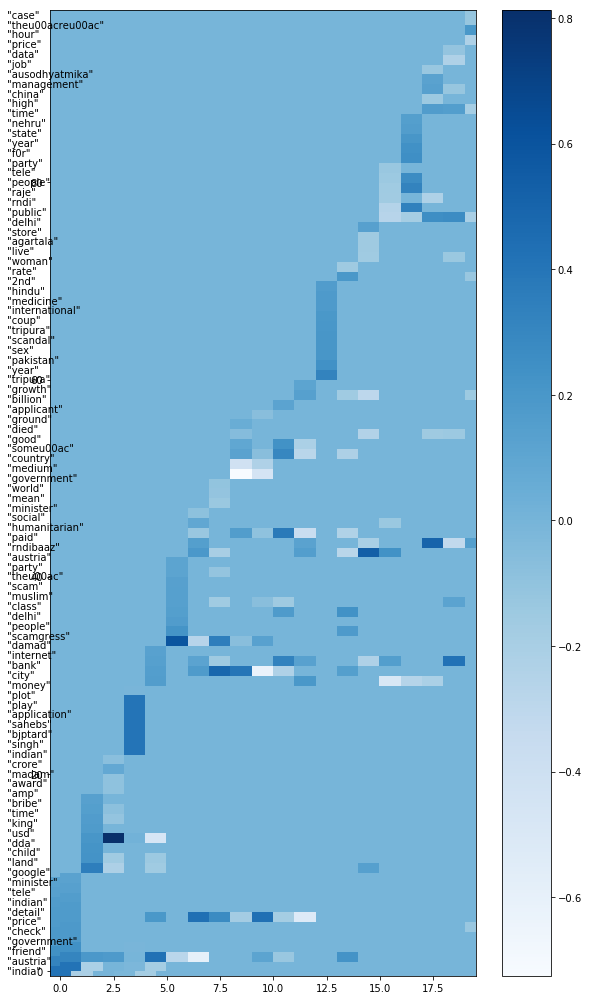

In [36]:
zz=np.resize(zz,(len(DC.keys()),zz.shape[1]))
plt.figure(figsize = (8,14))
plt.pcolor(zz,norm=None, cmap='Blues')
plt.colorbar(cmap='Blues')
plt.imshow(zz, cmap='Blues', interpolation='nearest',aspect='auto')
for val, key in enumerate(DC.keys()):
        plt.text(-2.5, val + 0.5, key,
                 horizontalalignment='left',
                 verticalalignment='top'
                 )
plt.gca().invert_yaxis()      # flip the y-axis so the texts are in the order
plt.tight_layout()            # fixes margins
plt.show()

In [37]:
def topics_to_vectorspace(n_topics, n_words=100):
    rows = []
    for i in xrange(n_topics):
        temp = model.show_topic(i, n_words)
        row = dict(((j[1],j[0]) for j in temp))
        rows.append(row)
    return rows
vec = DictVectorizer()
X = vec.fit_transform(topics_to_vectorspace(K))
X.shape

(20, 1991)

# PCA

In [ ]:
#pca = PCA(n_components=2)
#X_pca = pca.fit(X.toarray()).transform(X.toarray())
#for i in xrange(X_pca.shape[0]):
#    plt.scatter(X_pca[i, 0], X_pca[i, 1], alpha=.5)
#    plt.text(X_pca[i, 0], X_pca[i, 1], s=' ' + str(i))    
#plt.show()

/home/ubuntu/.virtualenvs/nlp/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


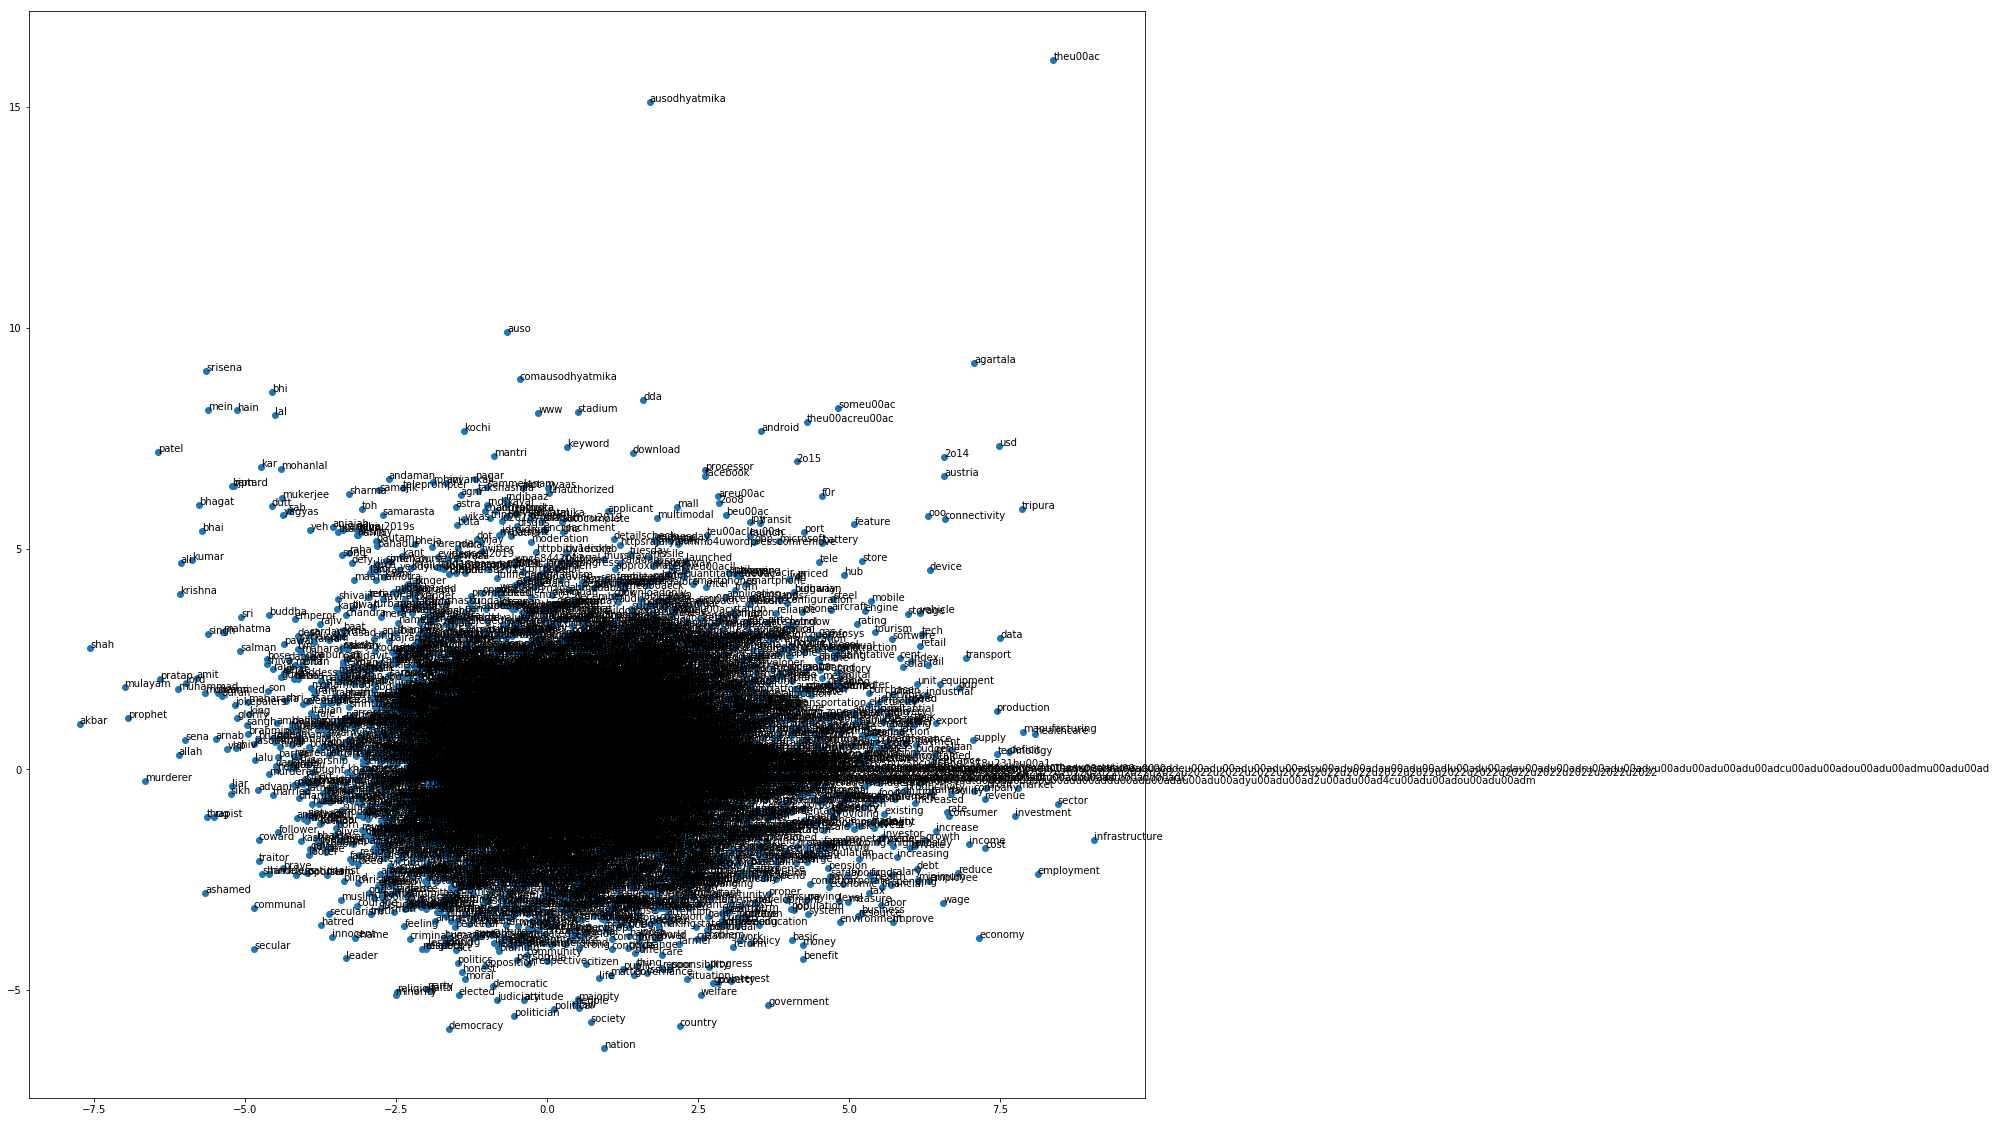

In [38]:
sentences = doc_clean
model = Word2Vec(sentences,workers=3)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.figure(figsize = (20,20))
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# <div class="alert alert-block alert-info"> <font color='red'> Non-Anonymous User (Neutral Comments) <font> </div> #



In [39]:
doc_complete = []
with open('verified_neutralcomment.txt') as f:
    for l in f:
        doc_complete.append(l) 

In [40]:
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    stop_free = " ".join([i for i in punc_free.split() if i not in stop_wrd])
    stop_free = ' '.join(i for i in stop_free.split() if not i.startswith('u0'))
    #stop_free = ' '.join(i for i in stop_free.split() if len(i)>3)
    stop_free = " ".join([i for i in stop_free.lower().split() if not unicode(i, 'utf-8').isnumeric()])
    normalized = " ".join(lemma.lemmatize(word) for word in stop_free.split())
    return normalized
doc_clean = [clean(doc).split() for doc in doc_complete]
print(doc_clean[:5])

[['tennesseeproud'], [u'decide', u'woman', u'havent', u'thought', u'decision', u'time', u'consult', u'doctor', u'arrogant', u'busybody'], ['bragging', 'complaining'], ['id', 'favor', 'bill', 'abortion', 'form', 'surgery'], [u'funny', u'edit', u'statement', u'past', u'censor', u'appearrently', u'f', u'word', u'injection', u'well', u'allowed', u'article']]


In [41]:
# frequency calculation of token in all documents
frequency = defaultdict(int)
for text in doc_clean:
    for token in text:
        frequency[token] += 1

In [42]:
# make new text data by removing out the token that have occurence less then 2
minimum_freq = 1
len_of_token = 2
# doc_clean = [[token for token in text if frequency[token] > minimum_freq]
#           for text in doc_clean]
doc_clean = [[token for token in text if len(token) > len_of_token and frequency[token] > minimum_freq]
          for text in doc_clean]
# print doc_clean1[17]

In [ ]:
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# LDA

In [ ]:
Lda = gensim.models.ldamulticore.LdaMulticore
ldamodel = Lda(doc_term_matrix, num_topics=200, id2word = dictionary, passes=20, workers=worker)

In [ ]:
#top_topics = model.top_topics(corpus, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
#avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
#print('Average topic coherence: %.4f.' % avg_topic_coherence)

#from pprint import pprint
#pprint(top_topics)

In [ ]:
print(ldamodel.print_topics(num_topics=20))

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)

# LSI

In [ ]:
model = LsiModel(doc_term_matrix, id2word=dictionary,num_topics=20)  # train model

In [ ]:
for c in model.print_topics(200):
     print c

# Heat Map

In [ ]:
K = model.num_topics
columns = []
columns_dict = {}
for k in range(1,K+1):
    columns.append(str(k))
    columns_dict[k-1] = ""

In [ ]:
df = pd.DataFrame(columns = columns)
pd.set_option('display.width', 1000)
zz = np.zeros(shape=(1000,K))
last_number=0
DC={}
for x in range (10):
  data = pd.DataFrame(columns_dict,index=[0])
  df=df.append(data,ignore_index=True)  
for line in model.print_topics(num_topics=K):
    tp, w = line
    #print tp
    probs=w.split("+")
    y=0
    for pr in probs:
        a=pr.split("*")
        df.iloc[y,tp] = a[1]       
        if a[1] in DC:
           zz[DC[a[1]]][tp]=a[0]
        else:
           zz[last_number][tp]=a[0]
           DC[a[1]]=last_number
           last_number=last_number+1
        y=y+1

In [ ]:
zz=np.resize(zz,(len(DC.keys()),zz.shape[1]))
plt.figure(figsize = (8,14))
plt.pcolor(zz,norm=None, cmap='Blues')
plt.colorbar(cmap='Blues')
plt.imshow(zz, cmap='Blues', interpolation='nearest',aspect='auto')
for val, key in enumerate(DC.keys()):
        plt.text(-2.5, val + 0.5, key,
                 horizontalalignment='left',
                 verticalalignment='top'
                 )
plt.gca().invert_yaxis()      # flip the y-axis so the texts are in the order
plt.tight_layout()            # fixes margins
plt.show()

In [ ]:
def topics_to_vectorspace(n_topics, n_words=100):
    rows = []
    for i in xrange(n_topics):
        temp = model.show_topic(i, n_words)
        row = dict(((j[1],j[0]) for j in temp))
        rows.append(row)
    return rows
vec = DictVectorizer()
X = vec.fit_transform(topics_to_vectorspace(K))
X.shape

# PCA

In [ ]:
#pca = PCA(n_components=2)
#X_pca = pca.fit(X.toarray()).transform(X.toarray())
#for i in xrange(X_pca.shape[0]):
#    plt.scatter(X_pca[i, 0], X_pca[i, 1], alpha=.5)
#    plt.text(X_pca[i, 0], X_pca[i, 1], s=' ' + str(i))    
#plt.show()

In [ ]:
sentences = doc_clean
model = Word2Vec(sentences,workers=3)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.figure(figsize = (20,20))
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# <div class="alert alert-block alert-info"><font color='red'> Anonymous user (Negative Comments) </font> </div>

In [ ]:
doc_complete = []
with open('anony_negativecomment.txt') as f:
    for l in f:
        doc_complete.append(l) 

In [ ]:
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    stop_free = " ".join([i for i in punc_free.split() if i not in stop_wrd])
    stop_free = ' '.join(i for i in stop_free.split() if not i.startswith('u0'))
    #stop_free = ' '.join(i for i in stop_free.split() if len(i)>3)
    stop_free = " ".join([i for i in stop_free.lower().split() if not unicode(i, 'utf-8').isnumeric()])
    normalized = " ".join(lemma.lemmatize(word) for word in stop_free.split())
    return normalized
doc_clean = [clean(doc).split() for doc in doc_complete]
print(doc_clean[:5])

In [ ]:
# frequency calculation of token in all documents
frequency = defaultdict(int)
for text in doc_clean:
    for token in text:
        frequency[token] += 1

In [ ]:
# make new text data by removing out the token that have occurence less then 2
minimum_freq = 1
len_of_token = 2
# doc_clean = [[token for token in text if frequency[token] > minimum_freq]
#           for text in doc_clean]
doc_clean = [[token for token in text if len(token) > len_of_token and frequency[token] > minimum_freq]
          for text in doc_clean]
# print doc_clean1[17]

In [ ]:
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# LDA

In [ ]:
Lda = gensim.models.ldamulticore.LdaMulticore
ldamodel = Lda(doc_term_matrix, num_topics=200, id2word = dictionary, passes=20, workers=worker)

In [ ]:
#top_topics = model.top_topics(corpus, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
#avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
#print('Average topic coherence: %.4f.' % avg_topic_coherence)

#from pprint import pprint
#pprint(top_topics)

In [ ]:
print(ldamodel.print_topics(num_topics=20))

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)

# LSI

In [ ]:
model = LsiModel(doc_term_matrix, id2word=dictionary,num_topics=20)  # train model

In [ ]:
for c in model.print_topics(200):
     print c

# Heat Map

In [ ]:
K = model.num_topics
columns = []
columns_dict = {}
for k in range(1,K+1):
    columns.append(str(k))
    columns_dict[k-1] = ""

In [ ]:
df = pd.DataFrame(columns = columns)
pd.set_option('display.width', 1000)
zz = np.zeros(shape=(1000,K))
last_number=0
DC={}
for x in range (10):
  data = pd.DataFrame(columns_dict,index=[0])
  df=df.append(data,ignore_index=True)  
for line in model.print_topics(num_topics=K):
    tp, w = line
    #print tp
    probs=w.split("+")
    y=0
    for pr in probs:
        a=pr.split("*")
        df.iloc[y,tp] = a[1]       
        if a[1] in DC:
           zz[DC[a[1]]][tp]=a[0]
        else:
           zz[last_number][tp]=a[0]
           DC[a[1]]=last_number
           last_number=last_number+1
        y=y+1

In [ ]:
zz=np.resize(zz,(len(DC.keys()),zz.shape[1]))
plt.figure(figsize = (8,14))
plt.pcolor(zz,norm=None, cmap='Blues')
plt.colorbar(cmap='Blues')
plt.imshow(zz, cmap='Blues', interpolation='nearest',aspect='auto')
for val, key in enumerate(DC.keys()):
        plt.text(-2.5, val + 0.5, key,
                 horizontalalignment='left',
                 verticalalignment='top'
                 )
plt.gca().invert_yaxis()      # flip the y-axis so the texts are in the order
plt.tight_layout()            # fixes margins
plt.show()

In [ ]:
def topics_to_vectorspace(n_topics, n_words=100):
    rows = []
    for i in xrange(n_topics):
        temp = model.show_topic(i, n_words)
        row = dict(((j[1],j[0]) for j in temp))
        rows.append(row)
    return rows
vec = DictVectorizer()
X = vec.fit_transform(topics_to_vectorspace(K))
X.shape

# PCA

In [ ]:
#pca = PCA(n_components=2)
#X_pca = pca.fit(X.toarray()).transform(X.toarray())
#for i in xrange(X_pca.shape[0]):
#    plt.scatter(X_pca[i, 0], X_pca[i, 1], alpha=.5)
#    plt.text(X_pca[i, 0], X_pca[i, 1], s=' ' + str(i))    
#plt.show()

In [ ]:
sentences = doc_clean
model = Word2Vec(sentences,workers=3)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.figure(figsize = (20,20))
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# <div class="alert alert-block alert-info"><font color='red'> Anonymous user (Positive Comments) </font></div>

In [ ]:
doc_complete = []
with open('anony_positivecomment.txt') as f:
    for l in f:
        doc_complete.append(l) 

In [ ]:
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    stop_free = " ".join([i for i in punc_free.split() if i not in stop_wrd])
    stop_free = ' '.join(i for i in stop_free.split() if not i.startswith('u0'))
    #stop_free = ' '.join(i for i in stop_free.split() if len(i)>3)
    stop_free = " ".join([i for i in stop_free.lower().split() if not unicode(i, 'utf-8').isnumeric()])
    normalized = " ".join(lemma.lemmatize(word) for word in stop_free.split())
    return normalized
doc_clean = [clean(doc).split() for doc in doc_complete]
print(doc_clean[:5])

In [ ]:
# frequency calculation of token in all documents
frequency = defaultdict(int)
for text in doc_clean:
    for token in text:
        frequency[token] += 1

In [ ]:
# make new text data by removing out the token that have occurence less then 2
minimum_freq = 1
len_of_token = 2
# doc_clean = [[token for token in text if frequency[token] > minimum_freq]
#           for text in doc_clean]
doc_clean = [[token for token in text if len(token) > len_of_token and frequency[token] > minimum_freq]
          for text in doc_clean]
# print doc_clean1[17]

In [ ]:
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# LDA

In [ ]:
Lda = gensim.models.ldamulticore.LdaMulticore
ldamodel = Lda(doc_term_matrix, num_topics=200, id2word = dictionary, passes=20 ,workers=worker)

In [ ]:
#top_topics = model.top_topics(corpus, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
#avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
#print('Average topic coherence: %.4f.' % avg_topic_coherence)

#from pprint import pprint
#pprint(top_topics)

In [ ]:
print(ldamodel.print_topics(num_topics=20))

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)

# LSI

In [ ]:
model = LsiModel(doc_term_matrix, id2word=dictionary,num_topics=20)  # train model

In [ ]:
for c in model.print_topics(200):
     print c

# Heat Map

In [ ]:
K = model.num_topics
columns = []
columns_dict = {}
for k in range(1,K+1):
    columns.append(str(k))
    columns_dict[k-1] = ""

In [ ]:
df = pd.DataFrame(columns = columns)
pd.set_option('display.width', 1000)
zz = np.zeros(shape=(1000,K))
last_number=0
DC={}
for x in range (10):
  data = pd.DataFrame(columns_dict,index=[0])
  df=df.append(data,ignore_index=True)  
for line in model.print_topics(num_topics=K):
    tp, w = line
    #print tp
    probs=w.split("+")
    y=0
    for pr in probs:
        a=pr.split("*")
        df.iloc[y,tp] = a[1]       
        if a[1] in DC:
           zz[DC[a[1]]][tp]=a[0]
        else:
           zz[last_number][tp]=a[0]
           DC[a[1]]=last_number
           last_number=last_number+1
        y=y+1

In [ ]:
zz=np.resize(zz,(len(DC.keys()),zz.shape[1]))
plt.figure(figsize = (8,14))
plt.pcolor(zz,norm=None, cmap='Blues')
plt.colorbar(cmap='Blues')
plt.imshow(zz, cmap='Blues', interpolation='nearest',aspect='auto')
for val, key in enumerate(DC.keys()):
        plt.text(-2.5, val + 0.5, key,
                 horizontalalignment='left',
                 verticalalignment='top'
                 )
plt.gca().invert_yaxis()      # flip the y-axis so the texts are in the order
plt.tight_layout()            # fixes margins
plt.show()

In [ ]:
def topics_to_vectorspace(n_topics, n_words=100):
    rows = []
    for i in xrange(n_topics):
        temp = model.show_topic(i, n_words)
        row = dict(((j[1],j[0]) for j in temp))
        rows.append(row)
    return rows
vec = DictVectorizer()
X = vec.fit_transform(topics_to_vectorspace(K))
X.shape

# PCA

In [ ]:
#pca = PCA(n_components=2)
#X_pca = pca.fit(X.toarray()).transform(X.toarray())
#for i in xrange(X_pca.shape[0]):
#    plt.scatter(X_pca[i, 0], X_pca[i, 1], alpha=.5)
#    plt.text(X_pca[i, 0], X_pca[i, 1], s=' ' + str(i))    
#plt.show()

In [ ]:
sentences = doc_clean
model = Word2Vec(sentences,workers=3)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.figure(figsize = (20,20))
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# <div class="alert alert-block alert-info"><font color='red'> Anonymous user (Neutral Comments) </font></div>

In [ ]:
doc_complete = []
with open('anony_neutralcomment.txt') as f:
    for l in f:
        doc_complete.append(l) 

In [ ]:
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    stop_free = " ".join([i for i in punc_free.split() if i not in stop_wrd])
    stop_free = ' '.join(i for i in stop_free.split() if not i.startswith('u0'))
    #stop_free = ' '.join(i for i in stop_free.split() if len(i)>3)
    stop_free = " ".join([i for i in stop_free.lower().split() if not unicode(i, 'utf-8').isnumeric()])
    normalized = " ".join(lemma.lemmatize(word) for word in stop_free.split())
    return normalized
doc_clean = [clean(doc).split() for doc in doc_complete]
print(doc_clean[:5])

In [ ]:
# frequency calculation of token in all documents
frequency = defaultdict(int)
for text in doc_clean:
    for token in text:
        frequency[token] += 1

In [ ]:
# make new text data by removing out the token that have occurence less then 2
minimum_freq = 1
len_of_token = 2
# doc_clean = [[token for token in text if frequency[token] > minimum_freq]
#           for text in doc_clean]
doc_clean = [[token for token in text if len(token) > len_of_token and frequency[token] > minimum_freq]
          for text in doc_clean]
# print doc_clean1[17]

In [ ]:
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# LDA

In [ ]:
Lda = gensim.models.ldamulticore.LdaMulticore
ldamodel = Lda(doc_term_matrix, num_topics=200, id2word = dictionary, passes=20, workers=worker)

In [ ]:
#top_topics = model.top_topics(corpus, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
#avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
#print('Average topic coherence: %.4f.' % avg_topic_coherence)

#from pprint import pprint
#pprint(top_topics)

In [ ]:
print(ldamodel.print_topics(num_topics=20))

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)

# LSI

In [ ]:
model = LsiModel(doc_term_matrix, id2word=dictionary,num_topics=20)  # train model

In [ ]:
for c in model.print_topics(200):
     print c

# Heat Map

In [ ]:
K = model.num_topics
columns = []
columns_dict = {}
for k in range(1,K+1):
    columns.append(str(k))
    columns_dict[k-1] = ""

In [ ]:
df = pd.DataFrame(columns = columns)
pd.set_option('display.width', 1000)
zz = np.zeros(shape=(1000,K))
last_number=0
DC={}
for x in range (10):
  data = pd.DataFrame(columns_dict,index=[0])
  df=df.append(data,ignore_index=True)  
for line in model.print_topics(num_topics=K):
    tp, w = line
    #print tp
    probs=w.split("+")
    y=0
    for pr in probs:
        a=pr.split("*")
        df.iloc[y,tp] = a[1]       
        if a[1] in DC:
           zz[DC[a[1]]][tp]=a[0]
        else:
           zz[last_number][tp]=a[0]
           DC[a[1]]=last_number
           last_number=last_number+1
        y=y+1

In [ ]:
zz=np.resize(zz,(len(DC.keys()),zz.shape[1]))
plt.figure(figsize = (8,14))
plt.pcolor(zz,norm=None, cmap='Blues')
plt.colorbar(cmap='Blues')
plt.imshow(zz, cmap='Blues', interpolation='nearest',aspect='auto')
for val, key in enumerate(DC.keys()):
        plt.text(-2.5, val + 0.5, key,
                 horizontalalignment='left',
                 verticalalignment='top'
                 )
plt.gca().invert_yaxis()      # flip the y-axis so the texts are in the order
plt.tight_layout()            # fixes margins
plt.show()

In [ ]:
def topics_to_vectorspace(n_topics, n_words=100):
    rows = []
    for i in xrange(n_topics):
        temp = model.show_topic(i, n_words)
        row = dict(((j[1],j[0]) for j in temp))
        rows.append(row)
    return rows
vec = DictVectorizer()
X = vec.fit_transform(topics_to_vectorspace(K))
X.shape

# PCA

In [ ]:
#pca = PCA(n_components=2)
#X_pca = pca.fit(X.toarray()).transform(X.toarray())
#for i in xrange(X_pca.shape[0]):
#    plt.scatter(X_pca[i, 0], X_pca[i, 1], alpha=.5)
#    plt.text(X_pca[i, 0], X_pca[i, 1], s=' ' + str(i))    
#plt.show()

In [ ]:
sentences = doc_clean
model = Word2Vec(sentences,workers=3)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.figure(figsize = (20,20))
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# <div class="alert alert-block alert-info"><font color='red'> Users with Anonymous profiles (Negative Comments) </font> </div>

In [ ]:
doc_complete = []
with open('null_negativecomment.txt') as f:
    for l in f:
        doc_complete.append(l) 

In [ ]:
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    stop_free = " ".join([i for i in punc_free.split() if i not in stop_wrd])
    stop_free = ' '.join(i for i in stop_free.split() if not i.startswith('u0'))
    #stop_free = ' '.join(i for i in stop_free.split() if len(i)>3)
    stop_free = " ".join([i for i in stop_free.lower().split() if not unicode(i, 'utf-8').isnumeric()])
    normalized = " ".join(lemma.lemmatize(word) for word in stop_free.split())
    return normalized
doc_clean = [clean(doc).split() for doc in doc_complete]
print(doc_clean[:5])

In [ ]:
# frequency calculation of token in all documents
frequency = defaultdict(int)
for text in doc_clean:
    for token in text:
        frequency[token] += 1

In [ ]:
# make new text data by removing out the token that have occurence less then 2
minimum_freq = 1
len_of_token = 2
# doc_clean = [[token for token in text if frequency[token] > minimum_freq]
#           for text in doc_clean]
doc_clean = [[token for token in text if len(token) > len_of_token and frequency[token] > minimum_freq]
          for text in doc_clean]
# print doc_clean1[17]

In [ ]:
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# LDA

In [ ]:
Lda = gensim.models.ldamulticore.LdaMulticore
ldamodel = Lda(doc_term_matrix, num_topics=200, id2word = dictionary, passes=20, workers=worker)

In [ ]:
#top_topics = model.top_topics(corpus, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
#avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
#print('Average topic coherence: %.4f.' % avg_topic_coherence)

#from pprint import pprint
#pprint(top_topics)

In [ ]:
print(ldamodel.print_topics(num_topics=20))

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)

# LSI

In [ ]:
model = LsiModel(doc_term_matrix, id2word=dictionary,num_topics=20)  # train model

In [ ]:
for c in model.print_topics(200):
     print c

# Heat Map

In [ ]:
K = model.num_topics
columns = []
columns_dict = {}
for k in range(1,K+1):
    columns.append(str(k))
    columns_dict[k-1] = ""

In [ ]:
df = pd.DataFrame(columns = columns)
pd.set_option('display.width', 1000)
zz = np.zeros(shape=(1000,K))
last_number=0
DC={}
for x in range (10):
  data = pd.DataFrame(columns_dict,index=[0])
  df=df.append(data,ignore_index=True)  
for line in model.print_topics(num_topics=K):
    tp, w = line
    #print tp
    probs=w.split("+")
    y=0
    for pr in probs:
        a=pr.split("*")
        df.iloc[y,tp] = a[1]       
        if a[1] in DC:
           zz[DC[a[1]]][tp]=a[0]
        else:
           zz[last_number][tp]=a[0]
           DC[a[1]]=last_number
           last_number=last_number+1
        y=y+1

In [ ]:
zz=np.resize(zz,(len(DC.keys()),zz.shape[1]))
plt.figure(figsize = (8,14))
plt.pcolor(zz,norm=None, cmap='Blues')
plt.colorbar(cmap='Blues')
plt.imshow(zz, cmap='Blues', interpolation='nearest',aspect='auto')
for val, key in enumerate(DC.keys()):
        plt.text(-2.5, val + 0.5, key,
                 horizontalalignment='left',
                 verticalalignment='top'
                 )
plt.gca().invert_yaxis()      # flip the y-axis so the texts are in the order
plt.tight_layout()            # fixes margins
plt.show()

In [ ]:
def topics_to_vectorspace(n_topics, n_words=100):
    rows = []
    for i in xrange(n_topics):
        temp = model.show_topic(i, n_words)
        row = dict(((j[1],j[0]) for j in temp))
        rows.append(row)
    return rows
vec = DictVectorizer()
X = vec.fit_transform(topics_to_vectorspace(K))
X.shape

# PCA

In [ ]:
#pca = PCA(n_components=2)
#X_pca = pca.fit(X.toarray()).transform(X.toarray())
#for i in xrange(X_pca.shape[0]):
#    plt.scatter(X_pca[i, 0], X_pca[i, 1], alpha=.5)
#    plt.text(X_pca[i, 0], X_pca[i, 1], s=' ' + str(i))    
#plt.show()

In [ ]:
sentences = doc_clean
model = Word2Vec(sentences,workers=3)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.figure(figsize = (20,20))
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# <div class="alert alert-block alert-info"><font color='red'> Users with Anonymous profiles (Positive Comments) </font> </div>

In [ ]:
doc_complete = []
with open('null_positivecomment.txt') as f:
    for l in f:
        doc_complete.append(l) 

In [ ]:
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    stop_free = " ".join([i for i in punc_free.split() if i not in stop_wrd])
    stop_free = ' '.join(i for i in stop_free.split() if not i.startswith('u0'))
    #stop_free = ' '.join(i for i in stop_free.split() if len(i)>3)
    stop_free = " ".join([i for i in stop_free.lower().split() if not unicode(i, 'utf-8').isnumeric()])
    normalized = " ".join(lemma.lemmatize(word) for word in stop_free.split())
    return normalized
doc_clean = [clean(doc).split() for doc in doc_complete]
print(doc_clean[:5])

In [ ]:
# frequency calculation of token in all documents
frequency = defaultdict(int)
for text in doc_clean:
    for token in text:
        frequency[token] += 1

In [ ]:
# make new text data by removing out the token that have occurence less then 2
minimum_freq = 1
len_of_token = 2
# doc_clean = [[token for token in text if frequency[token] > minimum_freq]
#           for text in doc_clean]
doc_clean = [[token for token in text if len(token) > len_of_token and frequency[token] > minimum_freq]
          for text in doc_clean]
# print doc_clean1[17]

In [ ]:
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# LDA

In [ ]:
Lda = gensim.models.ldamulticore.LdaMulticore
ldamodel = Lda(doc_term_matrix, num_topics=200, id2word = dictionary, passes=20, workers=worker)

In [ ]:
#top_topics = model.top_topics(corpus, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
#avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
#print('Average topic coherence: %.4f.' % avg_topic_coherence)

#from pprint import pprint
#pprint(top_topics)

In [ ]:
print(ldamodel.print_topics(num_topics=20))

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)

# LSI

In [ ]:
model = LsiModel(doc_term_matrix, id2word=dictionary,num_topics=20)  # train model

In [ ]:
for c in model.print_topics(200):
     print c

# Heat Map

In [ ]:
K = model.num_topics
columns = []
columns_dict = {}
for k in range(1,K+1):
    columns.append(str(k))
    columns_dict[k-1] = ""

In [ ]:
df = pd.DataFrame(columns = columns)
pd.set_option('display.width', 1000)
zz = np.zeros(shape=(1000,K))
last_number=0
DC={}
for x in range (10):
  data = pd.DataFrame(columns_dict,index=[0])
  df=df.append(data,ignore_index=True)  
for line in model.print_topics(num_topics=K):
    tp, w = line
    #print tp
    probs=w.split("+")
    y=0
    for pr in probs:
        a=pr.split("*")
        df.iloc[y,tp] = a[1]       
        if a[1] in DC:
           zz[DC[a[1]]][tp]=a[0]
        else:
           zz[last_number][tp]=a[0]
           DC[a[1]]=last_number
           last_number=last_number+1
        y=y+1

In [ ]:
zz=np.resize(zz,(len(DC.keys()),zz.shape[1]))
plt.figure(figsize = (8,14))
plt.pcolor(zz,norm=None, cmap='Blues')
plt.colorbar(cmap='Blues')
plt.imshow(zz, cmap='Blues', interpolation='nearest',aspect='auto')
for val, key in enumerate(DC.keys()):
        plt.text(-2.5, val + 0.5, key,
                 horizontalalignment='left',
                 verticalalignment='top'
                 )
plt.gca().invert_yaxis()      # flip the y-axis so the texts are in the order
plt.tight_layout()            # fixes margins
plt.show()

In [ ]:
def topics_to_vectorspace(n_topics, n_words=100):
    rows = []
    for i in xrange(n_topics):
        temp = model.show_topic(i, n_words)
        row = dict(((j[1],j[0]) for j in temp))
        rows.append(row)
    return rows
vec = DictVectorizer()
X = vec.fit_transform(topics_to_vectorspace(K))
X.shape

# PCA

In [ ]:
#pca = PCA(n_components=2)
#X_pca = pca.fit(X.toarray()).transform(X.toarray())
#for i in xrange(X_pca.shape[0]):
#    plt.scatter(X_pca[i, 0], X_pca[i, 1], alpha=.5)
#    plt.text(X_pca[i, 0], X_pca[i, 1], s=' ' + str(i))    
#plt.show()

In [ ]:
sentences = doc_clean
model = Word2Vec(sentences,workers=3)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.figure(figsize = (20,20))
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# <div class="alert alert-block alert-info"> <font color='red'> Users with Anonymous profiles (Neutral Comments) </font> </div>

In [ ]:
doc_complete = []
with open('null_neutralcomment.txt') as f:
    for l in f:
        doc_complete.append(l) 

In [ ]:
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    stop_free = " ".join([i for i in punc_free.split() if i not in stop_wrd])
    stop_free = ' '.join(i for i in stop_free.split() if not i.startswith('u0'))
    #stop_free = ' '.join(i for i in stop_free.split() if len(i)>3)
    stop_free = " ".join([i for i in stop_free.lower().split() if not unicode(i, 'utf-8').isnumeric()])
    normalized = " ".join(lemma.lemmatize(word) for word in stop_free.split())
    return normalized
doc_clean = [clean(doc).split() for doc in doc_complete]
print(doc_clean[:5])

In [ ]:
# frequency calculation of token in all documents
frequency = defaultdict(int)
for text in doc_clean:
    for token in text:
        frequency[token] += 1

In [ ]:
# make new text data by removing out the token that have occurence less then 2
minimum_freq = 1
len_of_token = 2
# doc_clean = [[token for token in text if frequency[token] > minimum_freq]
#           for text in doc_clean]
doc_clean = [[token for token in text if len(token) > len_of_token and frequency[token] > minimum_freq]
          for text in doc_clean]
# print doc_clean1[17]

In [ ]:
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# LDA

In [ ]:
Lda = gensim.models.ldamulticore.LdaMulticore
ldamodel = Lda(doc_term_matrix, num_topics=200, id2word = dictionary, passes=20, workers=worker)

In [ ]:
#top_topics = model.top_topics(corpus, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
#avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
#print('Average topic coherence: %.4f.' % avg_topic_coherence)

#from pprint import pprint
#pprint(top_topics)

In [ ]:
print(ldamodel.print_topics(num_topics=20))

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)

# LSI

In [ ]:
model = LsiModel(doc_term_matrix, id2word=dictionary,num_topics=20)  # train model

In [ ]:
for c in model.print_topics(200):
     print c

# Heat Map

In [ ]:
K = model.num_topics
columns = []
columns_dict = {}
for k in range(1,K+1):
    columns.append(str(k))
    columns_dict[k-1] = ""

In [ ]:
df = pd.DataFrame(columns = columns)
pd.set_option('display.width', 1000)
zz = np.zeros(shape=(1000,K))
last_number=0
DC={}
for x in range (10):
  data = pd.DataFrame(columns_dict,index=[0])
  df=df.append(data,ignore_index=True)  
for line in model.print_topics(num_topics=K):
    tp, w = line
    #print tp
    probs=w.split("+")
    y=0
    for pr in probs:
        a=pr.split("*")
        df.iloc[y,tp] = a[1]       
        if a[1] in DC:
           zz[DC[a[1]]][tp]=a[0]
        else:
           zz[last_number][tp]=a[0]
           DC[a[1]]=last_number
           last_number=last_number+1
        y=y+1

In [ ]:
zz=np.resize(zz,(len(DC.keys()),zz.shape[1]))
plt.figure(figsize = (8,14))
plt.pcolor(zz,norm=None, cmap='Blues')
plt.colorbar(cmap='Blues')
plt.imshow(zz, cmap='Blues', interpolation='nearest',aspect='auto')
for val, key in enumerate(DC.keys()):
        plt.text(-2.5, val + 0.5, key,
                 horizontalalignment='left',
                 verticalalignment='top'
                 )
plt.gca().invert_yaxis()      # flip the y-axis so the texts are in the order
plt.tight_layout()            # fixes margins
plt.show()

In [ ]:
def topics_to_vectorspace(n_topics, n_words=100):
    rows = []
    for i in xrange(n_topics):
        temp = model.show_topic(i, n_words)
        row = dict(((j[1],j[0]) for j in temp))
        rows.append(row)
    return rows
vec = DictVectorizer()
X = vec.fit_transform(topics_to_vectorspace(K))
X.shape

# PCA

In [ ]:
#pca = PCA(n_components=2)
#X_pca = pca.fit(X.toarray()).transform(X.toarray())
#for i in xrange(X_pca.shape[0]):
#    plt.scatter(X_pca[i, 0], X_pca[i, 1], alpha=.5)
#    plt.text(X_pca[i, 0], X_pca[i, 1], s=' ' + str(i))    
#plt.show()

In [ ]:
sentences = doc_clean
model = Word2Vec(sentences,workers=3)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.figure(figsize = (20,20))
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()